# Ejercicio 2

## 2.1 Ejecute y analice el siguiente código

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_csv("vehicle.csv")

# se transforma la columna de clase a valores enteros
df["class"] = df["class"].astype('category').cat.codes

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             45                      19                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176                379                        184   
1              170                330                        158   
2              223                635                        220   
3              160                309                        127   
4              241                325                        188   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70               6                16   
1                           72               9                14   
2                           73              14                 9   
3                           63               6                10   
4                          127               9                11   

   skewness_about.2  hollows_ratio  class  
0               187            197      3  
1               189            199      3  
2               188            196      2  
3               199            207      3  
4               180            183      0

In [4]:
# se crea la matriz de valores y las etiquetas de los clusters
x = df.to_numpy()[:, :-1]
clusters = df.to_numpy()[:, -1]

In [5]:
# se re-escalan los datos para que las columnas con valores más altos, no dominen los cálculos
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [6]:
def cluster_ac(x, n_clusters):
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    ac.fit(x)
    return ac.labels_


def cluster_dbscan(x):
    db = cluster.DBSCAN(metric='euclidean', eps=0.3)
    db.fit(x)
    return db.labels_


def cluster_kmeans(x, n_clusters):
    return cluster.k_means(x, n_clusters=n_clusters)[1]

c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  

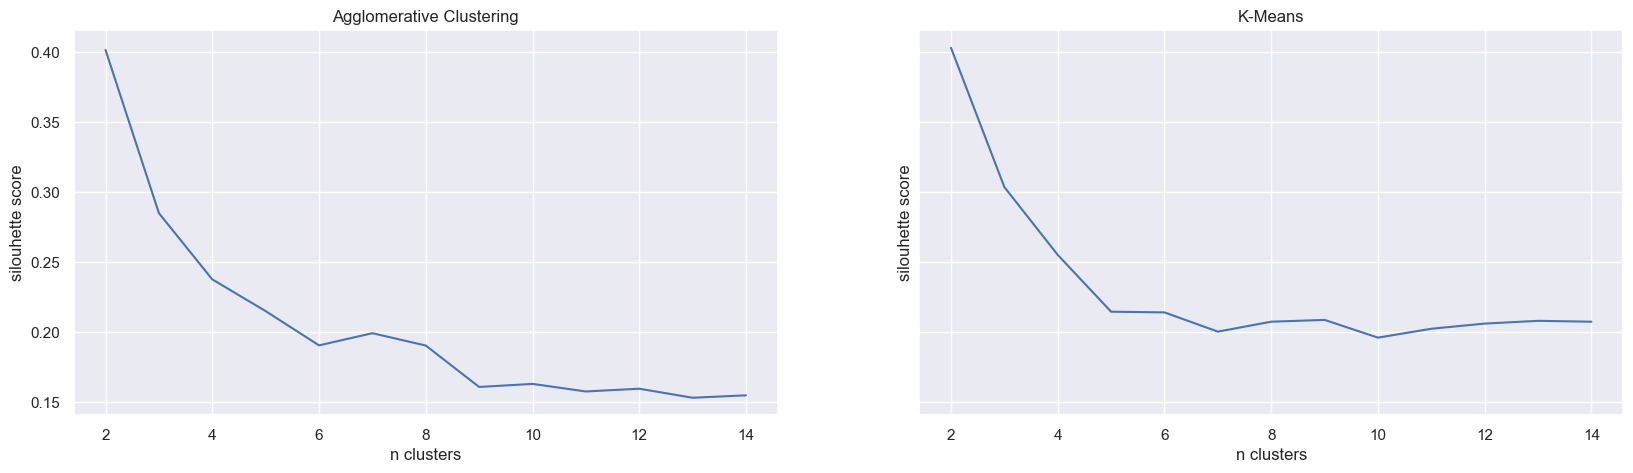

In [7]:
def calcular_silhouette(x):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
    
    methodos = [cluster_ac, cluster_kmeans]
    for i, m in enumerate(methodos):
        res = []
        for c in range(2, 15):
            res += [silhouette_score(x, m(x, c))]
            
        ax[i].plot(range(2, 15), res)
        ax[i].set_xlabel("n clusters")
        ax[i].set_ylabel("silouhette score")
        ax[i].set_title('Agglomerative Clustering' if i==0 else "K-Means")


calcular_silhouette(x)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  

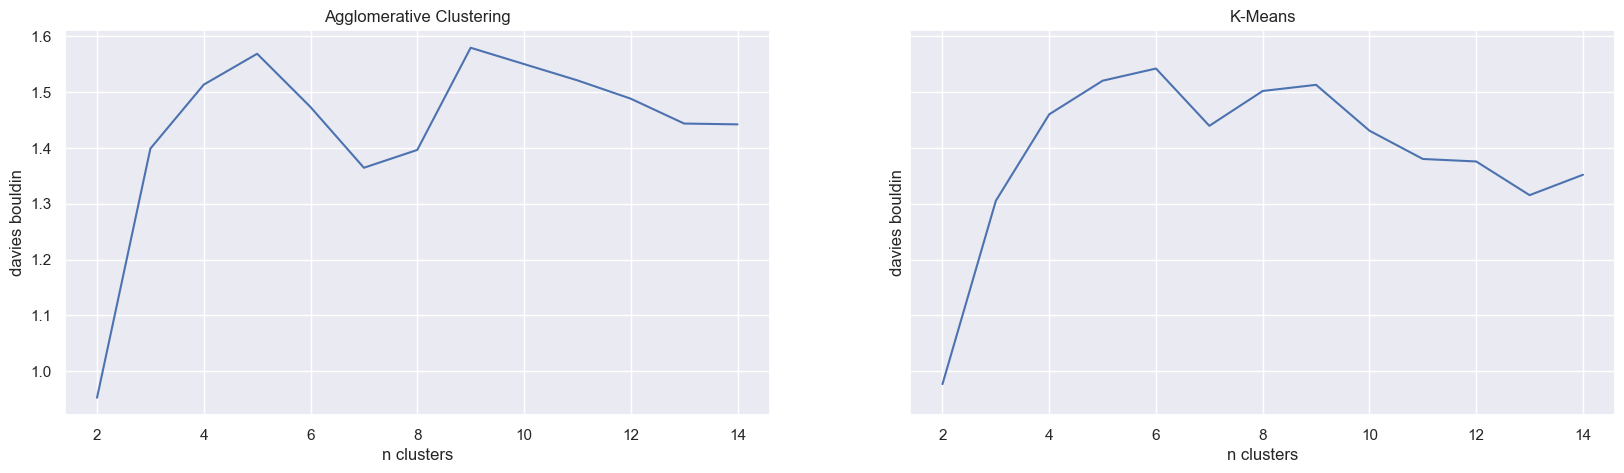

In [8]:
def calcular_davies_bouldin(x):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
    
    methodos = [cluster_ac, cluster_kmeans]
    for i, m in enumerate(methodos):
        res = []
        for c in range(2, 15):
            res += [davies_bouldin_score(x, m(x, c))]
            
        ax[i].plot(range(2, 15), res)
        ax[i].set_xlabel("n clusters")
        ax[i].set_ylabel("davies bouldin")
        ax[i].set_title('Agglomerative Clustering' if i==0 else "K-Means")


calcular_davies_bouldin(x)

## 2.2 ¿Qué número de clusters elegiría y por que?

A partir de las dos pruebas de calidad se puede evidenciar que las mismas sugieren que el número de cluster ideal es 2, pero con este número llegamos a una trivialidad en los datos, se puede agrupar por ejemplo: por tamaño, por peso, etc. Por lo cual el número de cluster 2 no aporta más conocimiento del que ya se conoce. Ahora analizando más valores para cluster esas métricas nos arrojan los valores de 3,4,7 donde se puede inferior lo siguiente:
- 3: es el siguiente valor mejor puntuado, por lo tanto debe ser considerado para su analisis
- 4: para la primera prueba es el siguiente mejor puntuado, pero para la segunda prueba no lo es. Consideramos que si en una prueba es favorable debe ser considerado.
- 7: en ambas pruebas este valor mostro mejoría a comparación del resto de valores cercanos, se considera al mismo pero también se puede cuestionar es necesario o favorable clasificar para este número? 

## 2.3 Mostrar resultados (ejecute el código a continuación)

In [9]:
def reducir_dim(x, ndim):
    pca = PCA(n_components=ndim)
    return pca.fit_transform(x)


def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


def reducir_dataset(x, how="original"):
    if how == "pca":
        res = reducir_dim(x, ndim=2)
    elif how == "tsne":
        res = reducir_dim_tsne(x, ndim=2)
    else:
        res = x[:, :2]

    return res
    

# se ejecutan algoritmos de clusterings con la configuración que le parezca más idónea
clus_ac = cluster_ac(x, 7)
clus_km = cluster_kmeans(x, 7)
clus_db = cluster_dbscan(x)

# se reducen las dimensiones de los datos originales para poder mostrar en pantalla
# x_red = reducir_dim(x, 2)
# x_red = reducir_dim_tsne(x, 2)
# x_red = x[:, :2]

# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="original"), clusters, clus_ac, clus_km, clus_db]), 
                      columns=["x", "y", "clusters", "clus_ac", "clus_km", "clus_db"])

c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


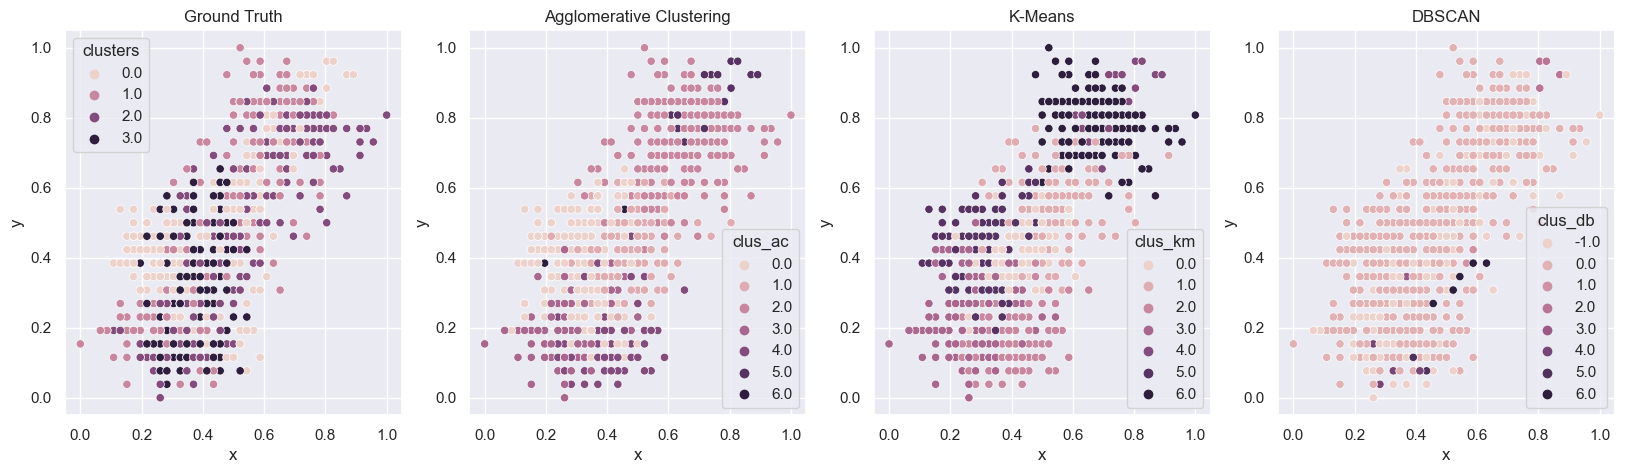

In [10]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    sns.scatterplot(data=res, x="x", y="y", hue="clusters", ax=ax[0], legend="full")
    ax[0].set_title('Ground Truth')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_ac", ax=ax[1], legend="full")
    ax[1].set_title('Agglomerative Clustering')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_km", ax=ax[2], legend="full")
    ax[2].set_title('K-Means')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_db", ax=ax[3], legend="full")
    ax[3].set_title('DBSCAN')
    

mostrar_resultados(results)

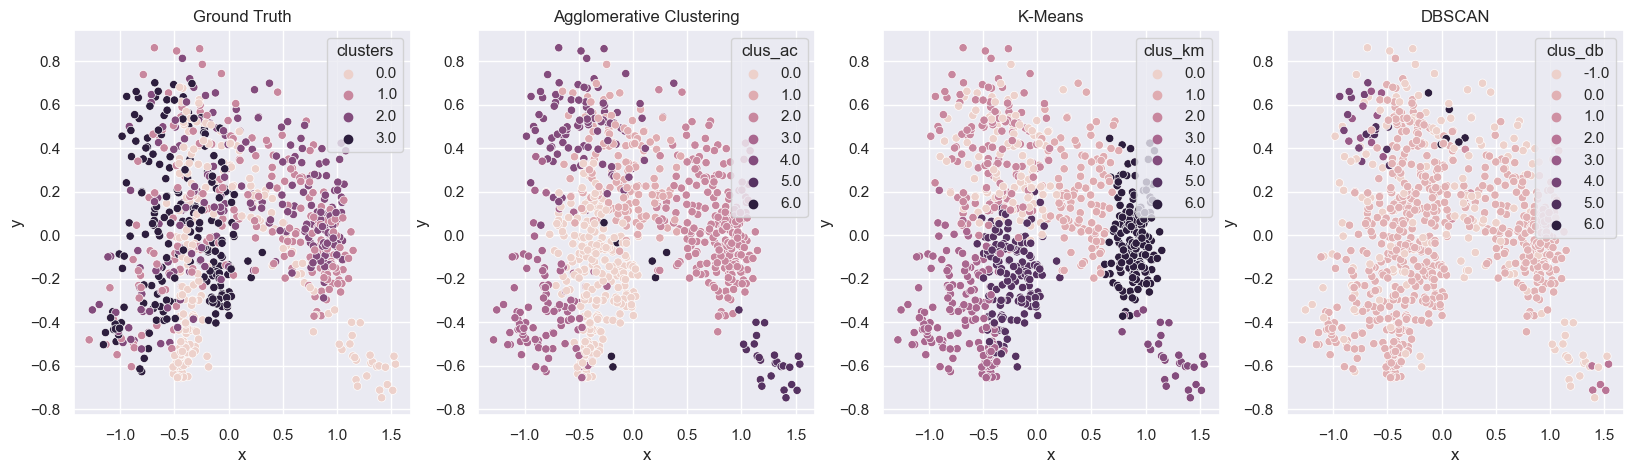

In [11]:
# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="pca"), clusters, clus_ac, clus_km, clus_db]), 
                      columns=["x", "y", "clusters", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)

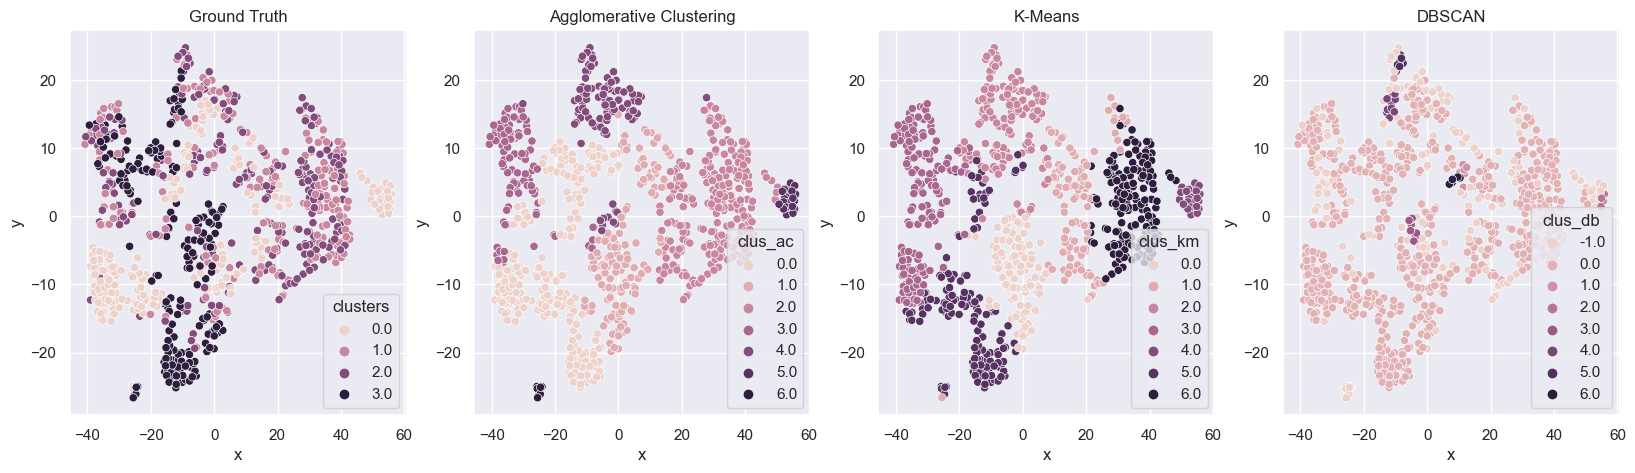

In [12]:
# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="tsne"), clusters, clus_ac, clus_km, clus_db]), 
                      columns=["x", "y", "clusters", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)

## 2.4 Analizando los resultados gráficos

comparando el gráfico con las clas clases orignales del problema ("ground truth") y las particiones obtenidas por los algoritmos de clustering, ¿Se pudieron recrear las particiones iniciales?

¿Por que si, o por que no?

## 2.5 Analizando los clusters

Ejecute el siguiente código y analice los resultados. Los gráficos de coordenadas paralelas revelan valores de las variables con una codificación de colores en base, en este caso, del cluster encontrado

In [13]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             45                      19                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176                379                        184   
1              170                330                        158   
2              223                635                        220   
3              160                309                        127   
4              241                325                        188   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70               6                16   
1                           72               9                14   
2                           73              14                 9   
3                           63               6                10   
4                          127               9                11   

   skewness_about.2  hollows_ratio  class  
0               187            197      3  
1               189            199      3  
2               188            196      2  
3               199            207      3  
4               180            183      0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   compactness                  846 non-null    int64
 1   circularity                  846 non-null    int64
 2   distance_circularity         846 non-null    int64
 3   radius_ratio                 846 non-null    int64
 4   pr.axis_aspect_ratio         846 non-null    int64
 5   max.length_aspect_ratio      846 non-null    int64
 6   scatter_ratio                846 non-null    int64
 7   elongatedness                846 non-null    int64
 8   pr.axis_rectangularity       846 non-null    int64
 9   max.length_rectangularity    846 non-null    int64
 10  scaled_variance              846 non-null    int64
 11  scaled_variance.1            846 non-null    int64
 12  scaled_radius_of_gyration    846 non-null    int64
 13  scaled_radius_of_gyration.1  846 non-null    int64

c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: >

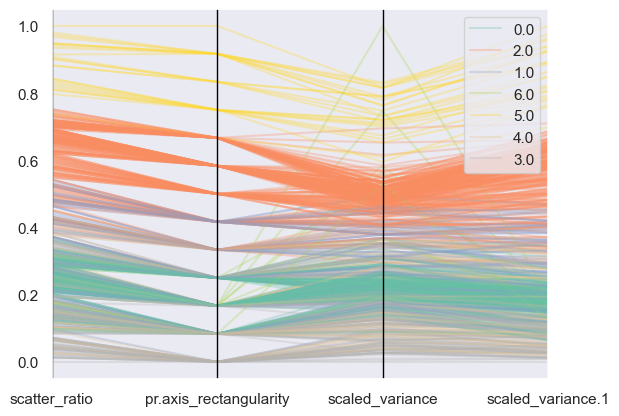

In [15]:
def crear_ds_cluster(datos, etiquetas):
    ds = np.column_stack([datos, etiquetas])
    return pd.DataFrame(ds)

ds_cluster = crear_ds_cluster(x, cluster_ac(x, 7))

ds_cluster.columns = list(df.columns)[:-1] + ["cluster"]
parallel_coordinates(ds_cluster.iloc[:, [6,8,10,11, -1]], 'cluster', colormap=plt.get_cmap("Set2"), alpha=0.3)

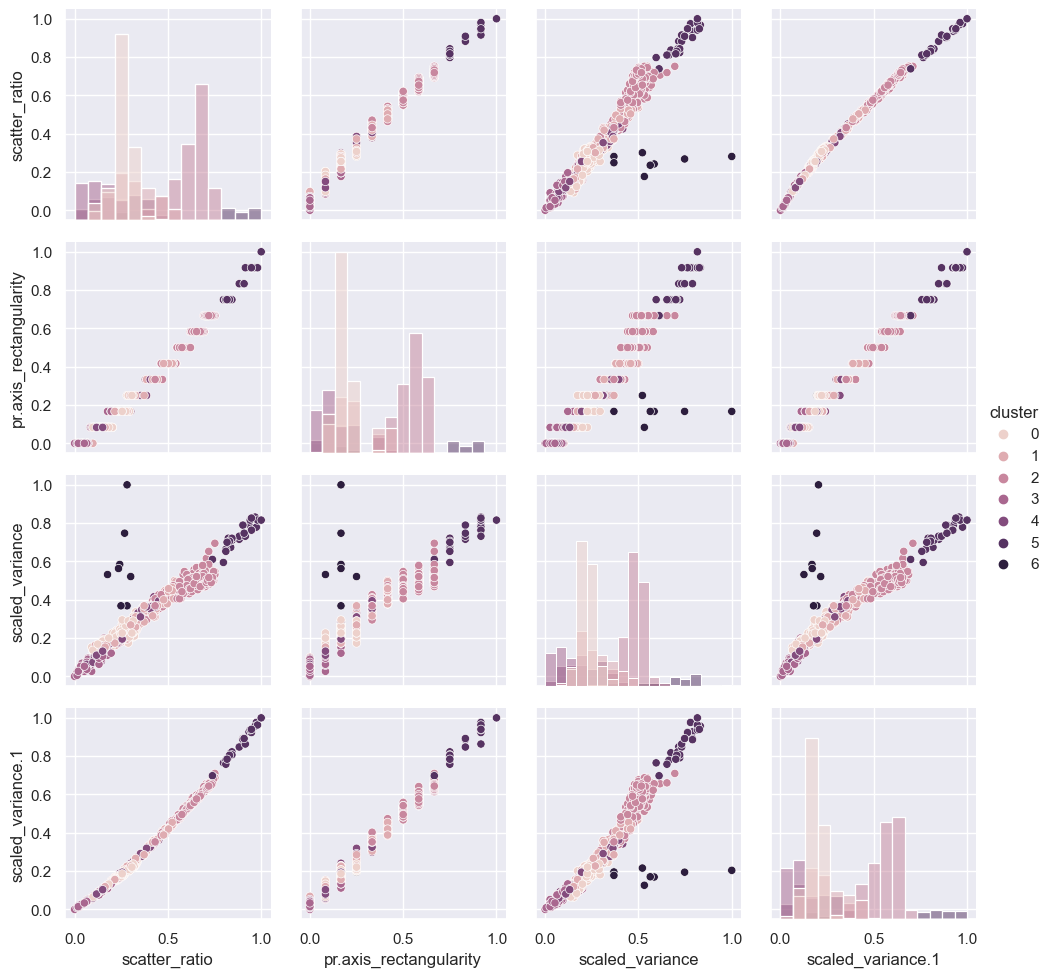

In [16]:
g = sns.PairGrid(ds_cluster.iloc[:, [6,8,10,11, -1]], hue="cluster")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


## 2.6 Analice los clusters

Pruebe manualmente distintas variables para generar el gráfico de coordenadas paralelas y el de pares. Responda las siguientes preguntas:

- ¿Que variables ayudan a caracterizar de mejor manera algún cluster?
- ¿Que variables son las mejores para hacer este análisis?
- ¿Que tan práctico es hacer este análisis si el problema tiene más dimensiones, por ejemplo > 30?

- Las siguientes variables permiten caracterizar de mejor manera los cluster:
scatter_ratio 6
pr.axis_rectangularity 8 
scaled_variance 10
scaled_variance.1 11
- 
- Llega a ser tedioso por la cantidad de combinaciones posibles

In [27]:
ds_cluster.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'cluster'],
      dtype='object')

c:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: >

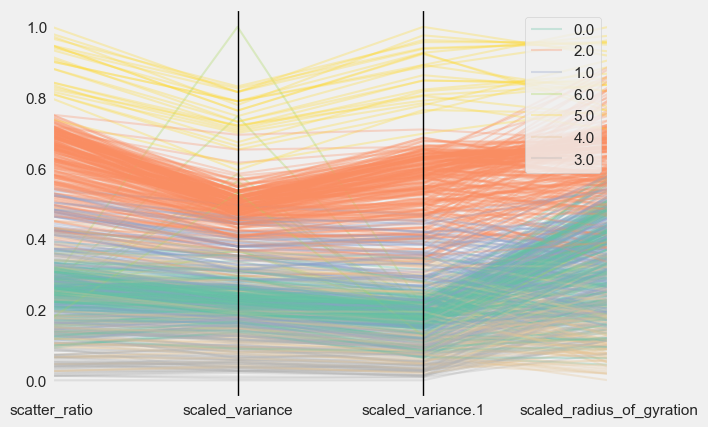

In [34]:
# inserte su código aquí

def crear_ds_cluster(datos, etiquetas):
    ds = np.column_stack([datos, etiquetas])
    return pd.DataFrame(ds)

ds_cluster = crear_ds_cluster(x, cluster_ac(x, 7))

ds_cluster.columns = list(df.columns)[:-1] + ["cluster"]
parallel_coordinates(ds_cluster.iloc[:, [6, 10, 11, 12, -1]], 'cluster', colormap=plt.get_cmap("Set2"), alpha=0.3)

Con las variables que considere más representativas, calcule valores estadísticos como promedios, mínimos, máximos, etc. Ahora intente ponerle un nombre a cada cluster.

In [18]:
# inserte su código aquí
df_var = df[['scatter_ratio', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1']]
df_var

scatter_ratio  pr.axis_rectangularity  scaled_variance  scaled_variance.1
0              162                      20              176                379
1              149                      19              170                330
2              207                      23              223                635
3              144                      19              160                309
4              149                      19              241                325
..             ...                     ...              ...                ...
841            169                      20              200                422
842            159                      20              173                368
843            222                      25              228                721
844            135                      18              155                270
845            120                      17              140                212

[846 rows x 4 columns]

In [19]:
df_var.describe()

scatter_ratio  pr.axis_rectangularity  scaled_variance  \
count     846.000000              846.000000       846.000000   
mean      168.839243               20.582742       188.625296   
std        33.244978                2.592138        31.394837   
min       112.000000               17.000000       130.000000   
25%       146.250000               19.000000       167.000000   
50%       157.000000               20.000000       178.500000   
75%       198.000000               23.000000       217.000000   
max       265.000000               29.000000       320.000000   

       scaled_variance.1  
count         846.000000  
mean          439.911348  
std           176.692614  
min           184.000000  
25%           318.250000  
50%           364.000000  
75%           587.000000  
max          1018.000000

## 2.7 Encuentre las variables importantes mediante técnicas de clasificación

Use la variable `ds_cluster` y entrene un modelo Random Forest, usando la columna `cluster` como variable de clasificación. Averigue como encontrar las variables más informativas de este modelo y use las que considere más representativas para repetir el análisis del ejercicio anterior.

¿Las variables que encontró manualmente son las mismas que las que encontró Random Forest?

In [20]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8

# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count
#import optuna

# Configuración warnings
# ==============================================================================

print(f"Versión de scikit-learn: {sklearn.__version__}")

Versión de scikit-learn: 1.3.0


In [21]:
# inserte su código aquí

# División de los datos en entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        ds_cluster.drop(columns="cluster"),
                                        ds_cluster['cluster'],
                                        test_size = 0.25,
                                        random_state = 123
                                    )

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto test: {X_test.shape[0]}")

# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

Tamaño conjunto entrenamiento: 634
Tamaño conjunto test: 212


RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [22]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X=X_test)
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.9402358490566038
